#                                               POSTTEST 6

* Nama  : Ananta Yusra Putra Akmal 
* NIM   : 2109106024
* Kelas : A1 2021

* Dataset = Credit Risk

#### Tampilan Dataset

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv("credit_risk.csv")
df = df.dropna()
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


#### Fitting Dataset
##### Menggunakan data person_incom dan person_emp_length untuk memprediksi loan_intent

In [2]:
df_subset = df[["person_income","person_emp_length"]]

ss = StandardScaler()

x_scaled = ss.fit_transform(df_subset)

print(x_scaled)

[[-0.12267385 28.45343299]
 [-0.91490728  0.05086649]
 [-0.91490728 -0.91193237]
 ...
 [ 0.14995709 -0.43053294]
 [ 1.33670353  0.05086649]
 [-0.39530479 -0.67123265]]


#### Pelatihan Model (K-Means Clustering)

In [3]:
model_kmeans = KMeans(n_clusters=10)
model_kmeans.fit(x_scaled)


KMeans(n_clusters=10)

In [4]:
labels = model_kmeans.labels_
print(labels)

[7 0 3 ... 8 1 3]


#### Crosstab
##### Akan ditampilkan hasil crosstab masing-masing label dari hasil model

In [5]:
df_kmeans = pd.DataFrame({'labels': labels, 'loan_intent': df.loan_intent})
# Buat Cross-Tab
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['loan_intent'])
print(ct1)

loan_intent  DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  PERSONAL  \
labels                                                                          
0                         1191       1701              652     1500      1317   
1                          376        456              331      357       429   
2                          216        177              196      247       241   
3                         1570       1998              948     1954      1624   
4                            8          2                4       11        10   
5                           77         81               68       68        80   
6                            0          0                0        0         1   
7                            0          0                0        0         1   
8                          562        696              524      506       583   
9                          565        593              475      650       591   

loan_intent  VENTURE  
labe

In [6]:
plt.style.use('ggplot')
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

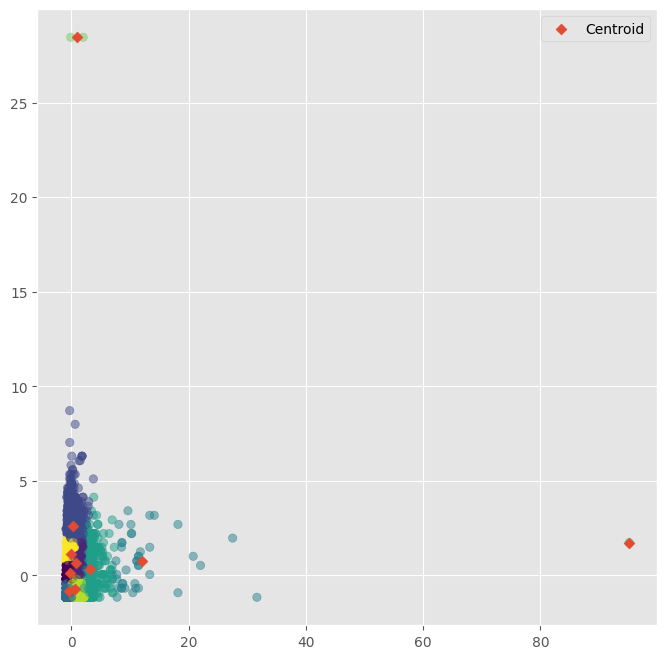

In [10]:
# Visualisasi Cluster 
plt.figure(figsize=(8,8))

# titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="D", s = 30)

# Beri label
plt.xlabel = ("person_income")
plt.ylabel = ("person_emp_length")

plt.legend()
plt.show()

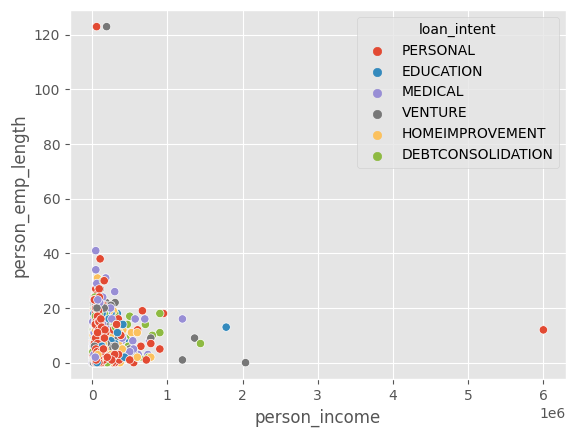

In [8]:
# labels Aktual
df_aktual = df[["person_income", "person_emp_length", "loan_intent"]]
sns.scatterplot(x = "person_income", y = "person_emp_length", data = df_aktual, hue = "loan_intent" )
plt.show()